In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [4]:
DATA_FOLDER = '/Users/zoemonnard/Documents/ada-2024-project-bada55/data/beer_dataset/'
BEER_ADVOCATE_FOLDER = DATA_FOLDER + 'BeerAdvocate/' #BA
RATE_BEER_FOLDER = DATA_FOLDER + 'RateBeer/' #RB

BA_USERS_DATASET = BEER_ADVOCATE_FOLDER + "users.csv"
RB_USERS_DATASET = RATE_BEER_FOLDER + "users.csv"

ba_users = pd.read_csv(BA_USERS_DATASET)
rb_users = pd.read_csv(RB_USERS_DATASET)


In [10]:
ba_users_plot = ba_users.copy()
rb_users_plot = rb_users.copy()
ba_users_plot.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [8]:
ba_users_plot.describe()

,nbr_ratings,nbr_reviews,joined
count,153704.000000,153704.000000,1.510520e+05
mean,54.605163,16.847876,1.357238e+09
std,252.388790,139.846706,9.195131e+07
min,1.000000,0.000000,8.407944e+08
25%,1.000000,0.000000,1.303121e+09
50%,3.000000,0.000000,1.391944e+09
75%,16.000000,2.000000,1.417691e+09
max,12046.000000,8970.000000,1.501495e+09


In [9]:
rb_users_plot.describe()

,nbr_ratings,user_id,joined
count,70174.000000,70174.000000,7.014400e+04
mean,108.820945,203689.319677,1.306632e+09
std,754.493211,143280.059822,1.300952e+08
min,1.000000,2.000000,9.555336e+08
25%,1.000000,70540.500000,1.204110e+09
50%,2.000000,193917.000000,1.340446e+09
75%,10.000000,327064.000000,1.405850e+09
max,46749.000000,489914.000000,1.501409e+09


In [11]:
def name_to_country(name: str) -> str:
    '''
    Determines the country associated with a given name string
    based on specific formatting rules.
    :param name: str, a string representing a geographical or generic name.
    :return: str, the formatted country name or the original input.
    '''
    if len(name) >= 13:
        if name.split('<')[0] in ['United States', 'Utah', 'New York', 'Illinois']:
            return 'United States'
        if name.split(',')[0] in ['United States']:
            return 'United States'
    return name

In [20]:
unique_locations_ba = ba_users_plot['location'].unique()
print("Unique locations in the 'location' column of beerAdvocate:")
for location in unique_locations_ba:
    print(location)

Unique locations in the 'location' column of beerAdvocate:
United States, Washington
United States, New York
Northern Ireland
United States, Kansas
United States, New Jersey
United States, North Carolina
United States, Oklahoma
United States, Pennsylvania
United States, California
nan
United States, Wisconsin
United States, Illinois
United States, Virginia
United States, Massachusetts
United States, South Carolina
United States, Georgia
United States, Louisiana
United States, West Virginia
United States, Alabama
United States, New Hampshire
United States, Indiana
United States, Rhode Island
United States, Missouri
United States, Arkansas
United States, Ohio
United States, Connecticut
United States, Florida
United States, Minnesota
United States, Maryland
United States, Alaska
United States, Mississippi
United States, Iowa
United States, Oregon
United States, Kentucky
England
Ireland
United States, Michigan
Serbia
Spain
Vietnam
Romania
Russia
United States, Colorado
Canada
United States

In [13]:
unique_locations_rb = rb_users_plot['location'].unique()
print("Unique locations in the 'location' column of RateBeer:")
for location in unique_locations_rb:
    print(location)

Unique locations in the 'location' column of RateBeer:
Poland
Spain
Germany
Belgium
United States, Connecticut
United States, Virginia
United States, Washington
United States, North Carolina
Denmark
Scotland
Sweden
Finland
nan
United States, Minnesota
Ireland
Northern Ireland
New Zealand
Estonia
England
Netherlands
Israel
Czech Republic
Singapore
United States, Wisconsin
United States, Alabama
France
Austria
Norway
Italy
Canada
Switzerland
Australia
United States, New York
Malaysia
United States, Texas
United States, Oregon
Belarus
United States, Georgia
United States, Michigan
United States, Ohio
United States, Maryland
Japan
Bulgaria
United States, Kansas
Russia
United States, California
United States, Pennsylvania
United States, New Jersey
Hungary
Greece
Luxembourg
Mexico
Wales
Slovenia
Croatia
Slovak Republic
Lithuania
China
Latvia
United States, Indiana
United States, Florida
United States, Illinois
Brazil
United States, Massachusetts
United States, Colorado
United States, Missour

In [47]:
# Count the number of nbr_ratings where location is NaN
nan_ratings_count = rb_users_plot[pd.isna(rb_users_plot['location'])]['nbr_ratings'].sum()

print(f"Total number of 'nbr_ratings' associated with NaN locations: {nan_ratings_count}")

Total number of 'nbr_ratings' associated with NaN locations: 220718


In [57]:
rb_users_plot.dropna(subset=['location'], inplace=True)
ba_users_plot.dropna(subset=['location'], inplace=True)
# Count the number of nbr_ratings where location is NaN
nan_ratings_count = rb_users_plot[pd.isna(rb_users_plot['location'])]['nbr_ratings'].sum()

print(f"Total number of 'nbr_ratings' associated with NaN locations: {nan_ratings_count}")

Total number of 'nbr_ratings' associated with NaN locations: 0


In [50]:

#number of reviews by location for BeerAdvocate
beeradvocate_reviews_by_region = ba_users_plot.groupby('location')['nbr_ratings'].sum().reset_index()
beeradvocate_reviews_by_region.rename(columns={'nbr_ratings': 'beeradvocate_reviews'}, inplace=True)

#number of reviews by location for RateBeer
ratebeer_reviews_by_region = rb_users_plot.groupby('location')['nbr_ratings'].sum().reset_index()
ratebeer_reviews_by_region.rename(columns={'nbr_ratings': 'ratebeer_reviews'}, inplace=True)

reviews_by_region = pd.merge(
    beeradvocate_reviews_by_region,
    ratebeer_reviews_by_region,
    on='location',
    how='outer'
)

reviews_by_region.fillna(0, inplace=True)

reviews_by_region['most_active_platform'] = reviews_by_region.apply(
    lambda row: 'BeerAdvocate' if row['beeradvocate_reviews'] > row['ratebeer_reviews']
    else 'RateBeer' if row['ratebeer_reviews'] > row['beeradvocate_reviews']
    else 'Tie',
    axis=1
)

reviews_by_region['total_reviews'] = reviews_by_region['beeradvocate_reviews'] + reviews_by_region['ratebeer_reviews']
reviews_by_region.sort_values('total_reviews', ascending=False, inplace=True)

display(reviews_by_region)
len(reviews_by_region)

,location,beeradvocate_reviews,ratebeer_reviews,most_active_platform,total_reviews
192,"United States, California",658200.0,333597.0,BeerAdvocate,991797.0
225,"United States, Pennsylvania",654042.0,233740.0,BeerAdvocate,887782.0
36,Canada,274512.0,546493.0,RateBeer,821005.0
200,"United States, Illinois",552906.0,185439.0,BeerAdvocate,738345.0
219,"United States, New York",492720.0,148819.0,BeerAdvocate,641539.0
...,...,...,...,...,...
177,Tibet,0.0,1.0,RateBeer,1.0
244,Virgin Islands (British),0.0,1.0,RateBeer,1.0
167,Sri Lanka,1.0,0.0,BeerAdvocate,1.0
154,Senegal,1.0,0.0,BeerAdvocate,1.0


250

In [51]:
top_10_beeradvocate = beeradvocate_reviews_by_region.sort_values(by='beeradvocate_reviews', ascending=False).head(10)
print("Top 10 Locations for BeerAdvocate:")
print(top_10_beeradvocate)

Top 10 Locations for BeerAdvocate:
                         location  beeradvocate_reviews
141     United States, California                658200
174   United States, Pennsylvania                654042
149       United States, Illinois                552906
168       United States, New York                492720
157  United States, Massachusetts                414197
179          United States, Texas                364368
171           United States, Ohio                310568
28                         Canada                274512
166     United States, New Jersey                273817
145        United States, Florida                246940


In [52]:
top_10_ratebeer = ratebeer_reviews_by_region.sort_values(by='ratebeer_reviews', ascending=False).head(10)
print("\nTop 10 Locations for RateBeer:")
print(top_10_ratebeer)


Top 10 Locations for RateBeer:
                        location  ratebeer_reviews
39                       Denmark            633814
28                        Canada            546493
45                       England            465714
164    United States, California            333597
144                       Sweden            305113
107                  Netherlands            263071
53                       Germany            238709
197  United States, Pennsylvania            233740
114                       Norway            231676
123                       Poland            207299


We see here that for BeerAdvocate most of the reviews are made in the USA. BeerAdvocate is a lot more present there even for California and Pennsylvania which is in the top 10 for Ratebeer, Beeradvocate has more reviews there (2x and 3x more).

/var/folders/5w/6s16lbnx19g0d7hy__grtsb40000gn/T/ipykernel_29699/3737576986.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_beeradvocate = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/5w/6s16lbnx19g0d7hy__grtsb40000gn/T/ipykernel_29699/3737576986.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_ratebeer = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


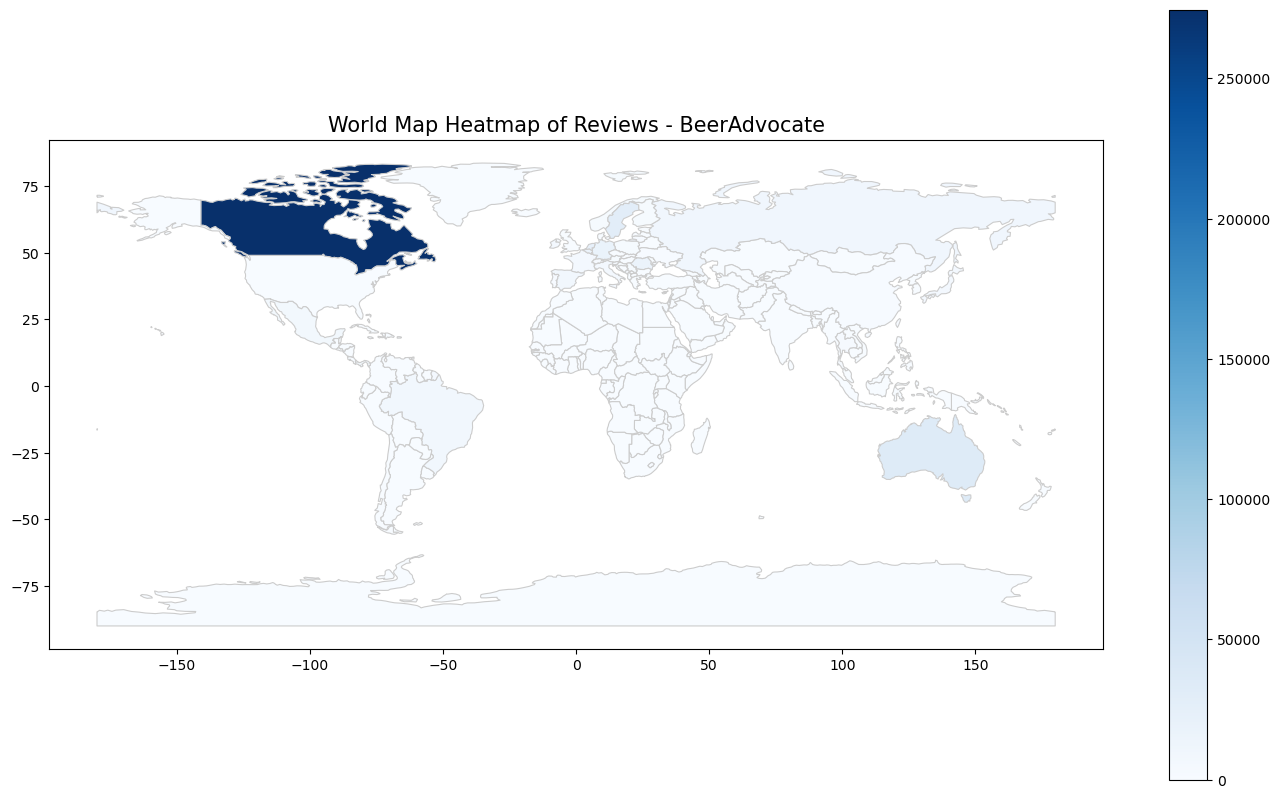

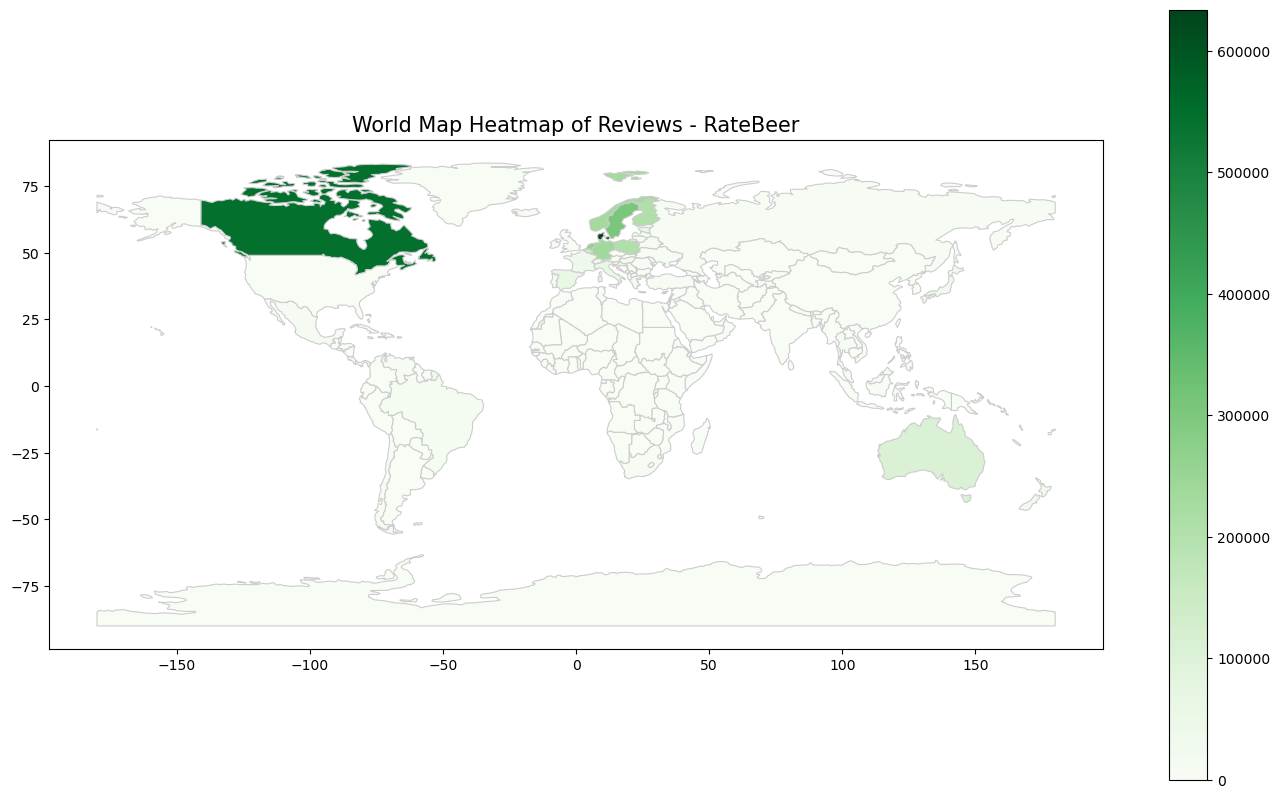

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Separate the data for BeerAdvocate and RateBeer
beeradvocate_data = reviews_by_region[['location', 'beeradvocate_reviews']].rename(columns={'beeradvocate_reviews': 'reviews'})
ratebeer_data = reviews_by_region[['location', 'ratebeer_reviews']].rename(columns={'ratebeer_reviews': 'reviews'})

# Load world shapefile and clean geometries for BeerAdvocate
world_beeradvocate = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_beeradvocate['geometry'] = world_beeradvocate['geometry'].apply(lambda geom: geom.representative_point() if geom.is_empty else geom)
world_beeradvocate = world_beeradvocate.merge(beeradvocate_data, how='left', left_on='name', right_on='location')
world_beeradvocate['reviews'] = world_beeradvocate['reviews'].fillna(0)

# Load world shapefile and clean geometries for RateBeer
world_ratebeer = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_ratebeer['geometry'] = world_ratebeer['geometry'].apply(lambda geom: geom.representative_point() if geom.is_empty else geom)
world_ratebeer = world_ratebeer.merge(ratebeer_data, how='left', left_on='name', right_on='location')
world_ratebeer['reviews'] = world_ratebeer['reviews'].fillna(0)

# Plot the BeerAdvocate heatmap
fig, ax = plt.subplots(1, 1, figsize=(17, 10))
world_beeradvocate.plot(column='reviews', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('World Map Heatmap of Reviews - BeerAdvocate', fontsize=15)
plt.show()

# Plot the RateBeer heatmap
fig, ax = plt.subplots(1, 1, figsize=(17, 10))
world_ratebeer.plot(column='reviews', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('World Map Heatmap of Reviews - RateBeer', fontsize=15)
plt.show()

/var/folders/5w/6s16lbnx19g0d7hy__grtsb40000gn/T/ipykernel_29699/3737576986.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_beeradvocate = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/5w/6s16lbnx19g0d7hy__grtsb40000gn/T/ipykernel_29699/3737576986.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_ratebeer = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


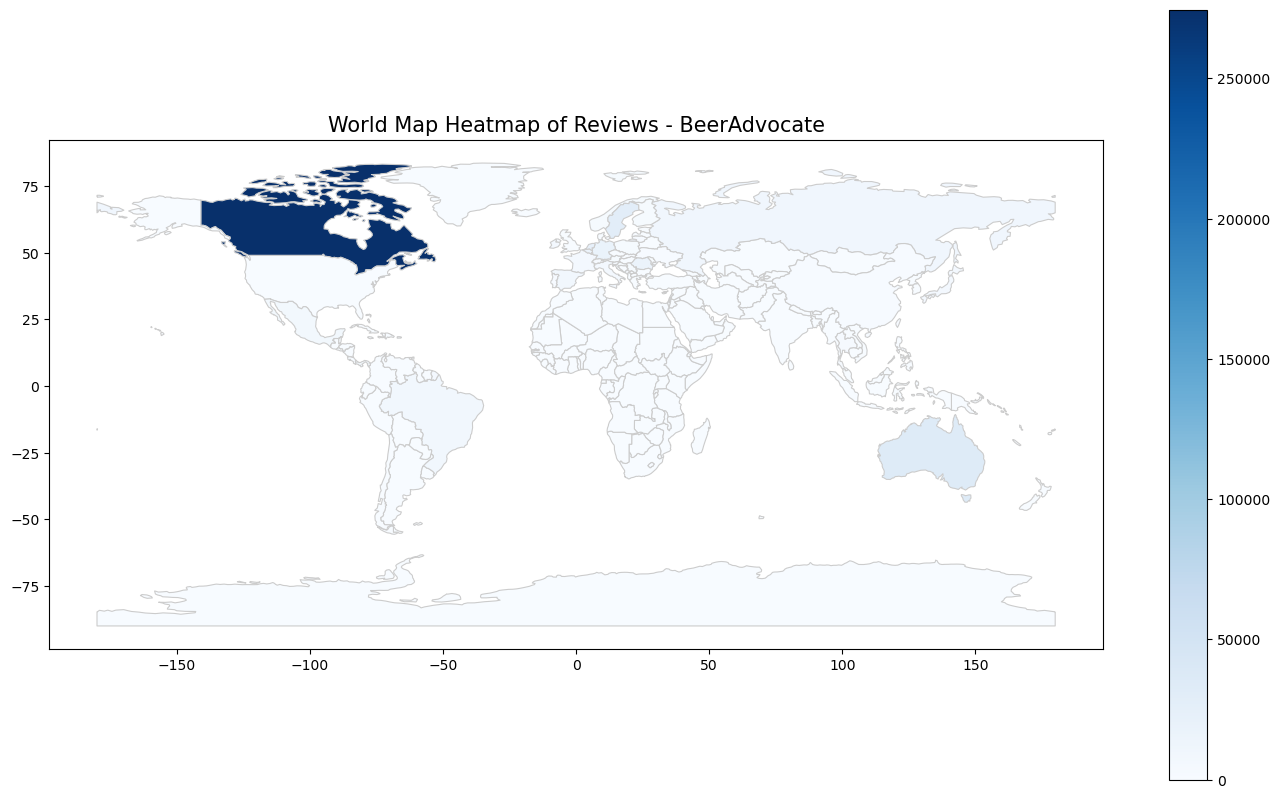

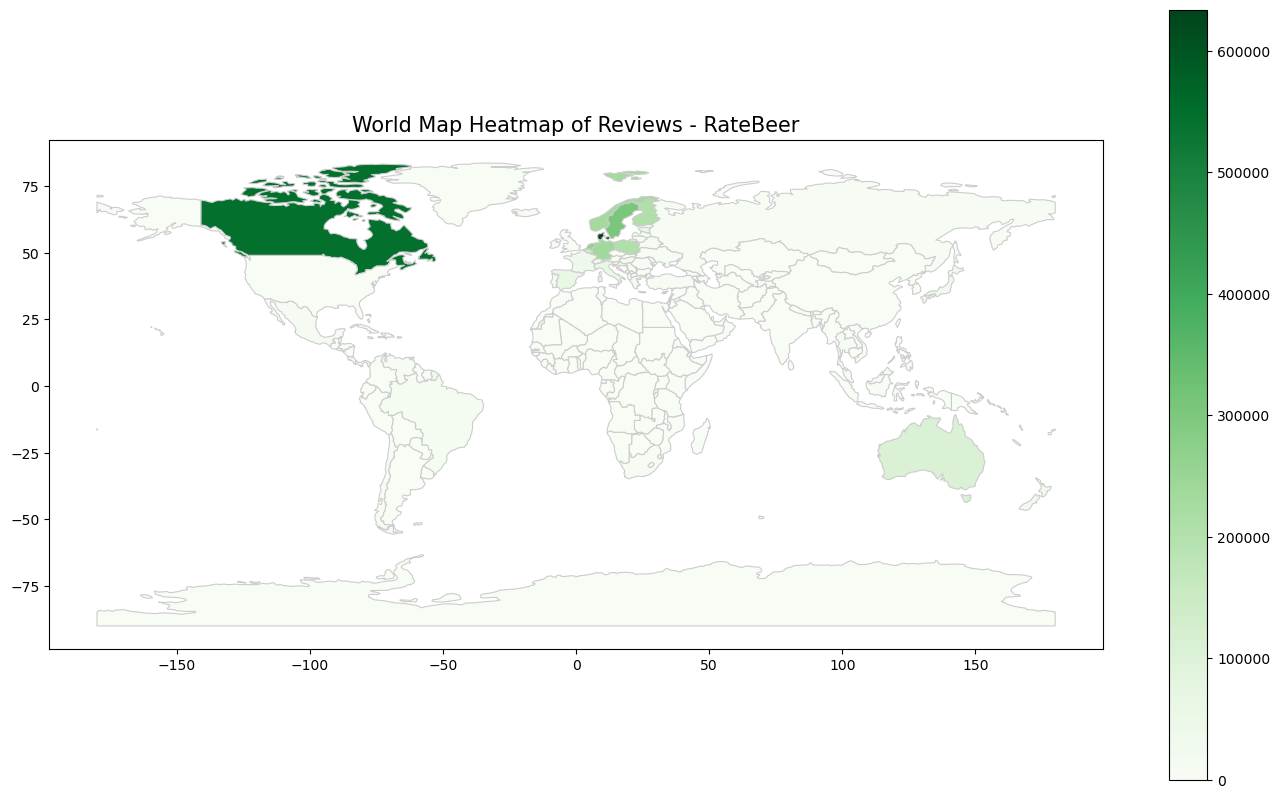

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Separate the data for BeerAdvocate and RateBeer
beeradvocate_data = reviews_by_region[['location', 'beeradvocate_reviews']].rename(columns={'beeradvocate_reviews': 'reviews'})
ratebeer_data = reviews_by_region[['location', 'ratebeer_reviews']].rename(columns={'ratebeer_reviews': 'reviews'})

# Load world shapefile and clean geometries for BeerAdvocate
world_beeradvocate = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_beeradvocate['geometry'] = world_beeradvocate['geometry'].apply(lambda geom: geom.representative_point() if geom.is_empty else geom)
world_beeradvocate = world_beeradvocate.merge(beeradvocate_data, how='left', left_on='name', right_on='location')
world_beeradvocate['reviews'] = world_beeradvocate['reviews'].fillna(0)

# Load world shapefile and clean geometries for RateBeer
world_ratebeer = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_ratebeer['geometry'] = world_ratebeer['geometry'].apply(lambda geom: geom.representative_point() if geom.is_empty else geom)
world_ratebeer = world_ratebeer.merge(ratebeer_data, how='left', left_on='name', right_on='location')
world_ratebeer['reviews'] = world_ratebeer['reviews'].fillna(0)

# Plot the BeerAdvocate heatmap
fig, ax = plt.subplots(1, 1, figsize=(17, 10))
world_beeradvocate.plot(column='reviews', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('World Map Heatmap of Reviews - BeerAdvocate', fontsize=15)
plt.show()

# Plot the RateBeer heatmap
fig, ax = plt.subplots(1, 1, figsize=(17, 10))
world_ratebeer.plot(column='reviews', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('World Map Heatmap of Reviews - RateBeer', fontsize=15)
plt.show()

Les Etats-Unis ne sont pas représentés ici (virgule dans le nom) refaire la même mais en regroupant les états.

In [58]:
# Function to extract the country name from the location
def extract_country(location):
    if ',' in location:
        return location.split(',')[0].strip()  # Extract everything before the comma
    return location.strip()  # If no comma, return the location as is
    
rb_users_plot['location'] = rb_users_plot['location'].astype(str)
ba_users_plot['location'] = ba_users_plot['location'].astype(str)

ba_users_usa = ba_users_plot.copy()
rb_users_usa = rb_users_plot.copy()

ba_users_usa['location'] = ba_users_usa['location'].apply(extract_country)
rb_users_usa['location'] = rb_users_usa['location'].apply(extract_country)

beeradvocate_reviews_by_region2 = ba_users_usa.groupby('location')['nbr_ratings'].sum().reset_index()
beeradvocate_reviews_by_region2.rename(columns={'nbr_ratings': 'beeradvocate_reviews'}, inplace=True)

ratebeer_reviews_by_region2 = rb_users_usa.groupby('location')['nbr_ratings'].sum().reset_index()
ratebeer_reviews_by_region2.rename(columns={'nbr_ratings': 'ratebeer_reviews'}, inplace=True)

reviews_by_region2 = pd.merge(
    beeradvocate_reviews_by_region2,
    ratebeer_reviews_by_region2,
    on='location',
    how='outer'
)

reviews_by_region2.fillna(0, inplace=True)

reviews_by_region2['most_active_platform'] = reviews_by_region2.apply(
    lambda row: 'BeerAdvocate' if row['beeradvocate_reviews'] > row['ratebeer_reviews']
    else 'RateBeer' if row['ratebeer_reviews'] > row['beeradvocate_reviews']
    else 'Tie',
    axis=1
)

reviews_by_region2['total_reviews'] = reviews_by_region2['beeradvocate_reviews'] + reviews_by_region2['ratebeer_reviews']
reviews_by_region2.sort_values('total_reviews', ascending=False, inplace=True)

display(reviews_by_region2)
len(reviews_by_region2)

,location,beeradvocate_reviews,ratebeer_reviews,most_active_platform,total_reviews
188,United States,7303870.0,3274619.0,BeerAdvocate,10578489.0
36,Canada,274512.0,546493.0,RateBeer,821005.0
48,Denmark,893.0,633814.0,RateBeer,634707.0
54,England,41597.0,465714.0,RateBeer,507311.0
170,Sweden,29914.0,305113.0,RateBeer,335027.0
...,...,...,...,...,...
81,Iran,0.0,1.0,RateBeer,1.0
184,Tuvalu,0.0,1.0,RateBeer,1.0
177,Tibet,0.0,1.0,RateBeer,1.0
58,Falkland Islands,0.0,1.0,RateBeer,1.0


201

In [59]:
top_10_beeradvocate2 = beeradvocate_reviews_by_region2.sort_values(by='beeradvocate_reviews', ascending=False).head(10)
print("Top 10 Locations for BeerAdvocate:")
print(top_10_beeradvocate2)

Top 10 Locations for BeerAdvocate:
          location  beeradvocate_reviews
137  United States               7303870
28          Canada                274512
43         England                 41597
11       Australia                 34915
124         Sweden                 29914
91     Netherlands                 22952
51         Germany                 17460
107        Romania                 16823
16         Belgium                 16478
108         Russia                 10521


In [60]:
top_10_ratebeer2 = ratebeer_reviews_by_region2.sort_values(by='ratebeer_reviews', ascending=False).head(10)
print("\nTop 10 Locations for RateBeer:")
print(top_10_ratebeer2)


Top 10 Locations for RateBeer:
          location  ratebeer_reviews
160  United States           3274619
39         Denmark            633814
28          Canada            546493
45         England            465714
144         Sweden            305113
107    Netherlands            263071
53         Germany            238709
114         Norway            231676
123         Poland            207299
50         Finland            205541


In [85]:
def countries_with_most_active_beeradvocate(reviews_by_region):
    """
    Identifies countries where BeerAdvocate is the most active platform.
    
    :param reviews_by_region: DataFrame containing region-level review counts for BeerAdvocate and RateBeer,
                              including columns 'location', 'most_active_platform'.
    :return: List of countries where BeerAdvocate is the most active platform.
    """
    # Filter rows where the most active platform is 'BeerAdvocate'
    beeradvocate_active_countries = reviews_by_region[reviews_by_region['most_active_platform'] == 'BeerAdvocate']
    
    # Extract and return the list of countries
    return beeradvocate_active_countries['location'].tolist()

# Example usage
most_active_beeradvocate_countries = countries_with_most_active_beeradvocate(reviews_by_region2)

print("Countries where BeerAdvocate is the most active platform:")
print(most_active_beeradvocate_countries)
print (len(most_active_beeradvocate_countries))

Countries where BeerAdvocate is the most active platform:
['United States of America', 'Romania', 'Russia', 'Panama', 'Puerto Rico', 'Jersey', 'Philippines', 'Lesotho', 'Aotearoa', 'Svalbard and Jan Mayen Islands', 'Tajikistan', 'Costa Rica', 'Guatemala', 'Lebanon', 'Vietnam', 'United Arab Emirates', 'Jordan', 'Antarctica', 'Ethiopia', 'Bahamas', 'Heard and McDonald Islands', 'Honduras', 'Fiji Islands', 'Uzbekistan', 'Malta', 'Turkmenistan', 'Burkina Faso', 'Trinidad and Tobago', 'Haiti', 'Aruba', 'American Samoa', 'Christmas Island', 'Bouvet Island', 'South Georgia and South Sandwich Islands', 'Rwanda', 'Barbados', 'Bhutan', 'Papua New Guinea', 'Nicaragua', 'New Caledonia', 'Angola', 'Northern Mariana Islands', 'Equatorial Guinea', 'Tokelau', 'Guernsey', 'Antigua and Barbuda', 'Solomon Islands', 'British Indian Ocean Territory', 'Anguilla', 'Liberia', 'Seychelles', 'Senegal', 'Mauritania', 'Malvinas', 'Sri Lanka', 'Gibraltar']
56


/var/folders/5w/6s16lbnx19g0d7hy__grtsb40000gn/T/ipykernel_29699/3478428366.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_beeradvocate2 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/5w/6s16lbnx19g0d7hy__grtsb40000gn/T/ipykernel_29699/3478428366.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_ratebeer2 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


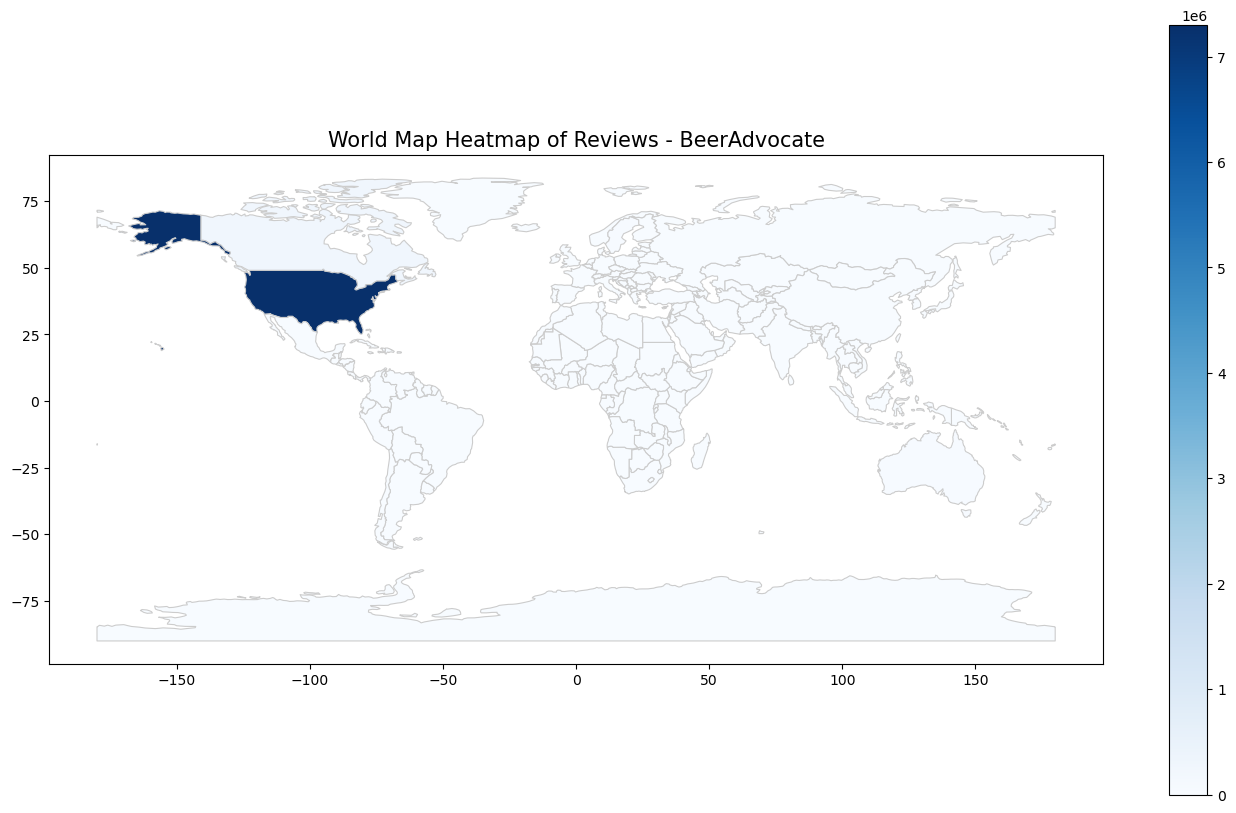

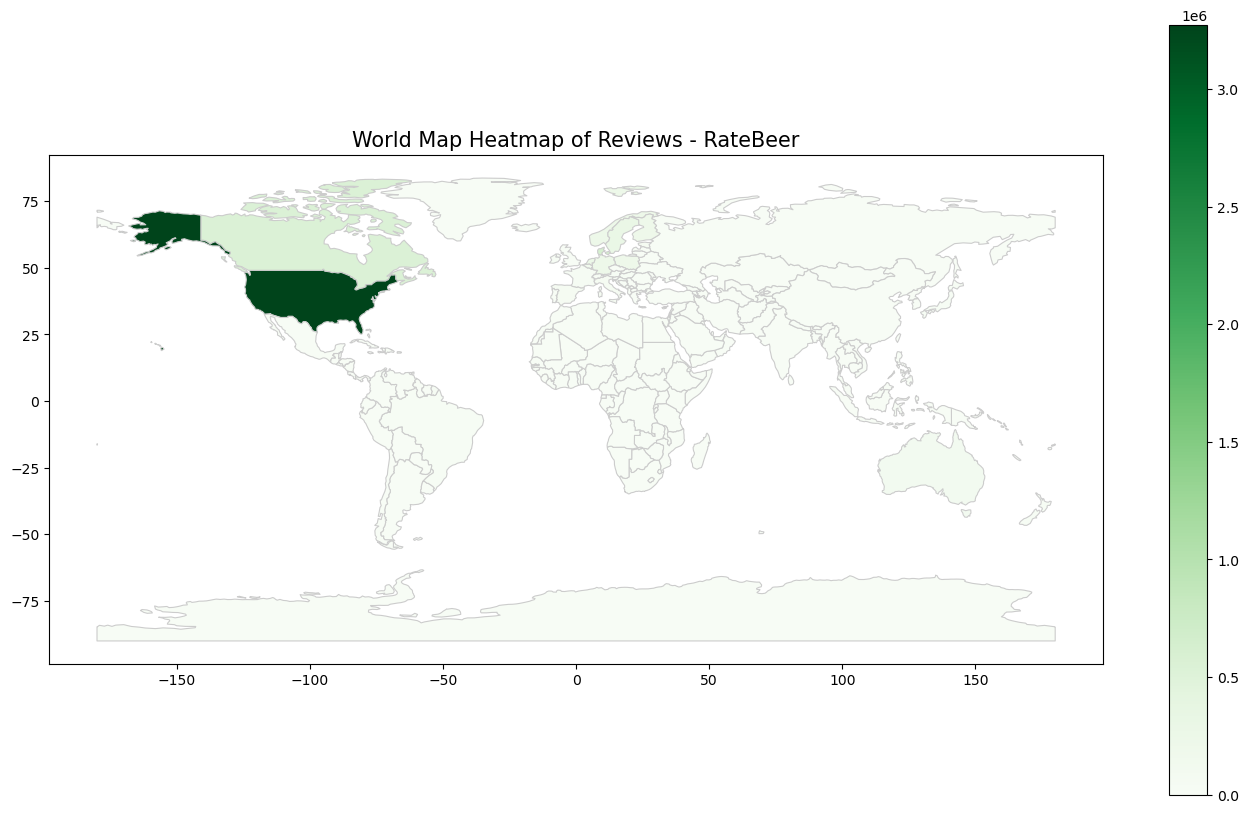

In [86]:
#sur les 200 pays il n'y en a seulement 1/4 ou les reviews ont été plus faites sur BeerAdvocate
#Redo the heatmap but this time with United States
reviews_by_region2['location'] = reviews_by_region2['location'].replace('United States', 'United States of America')

beeradvocate_data2 = reviews_by_region2[['location', 'beeradvocate_reviews']].rename(columns={'beeradvocate_reviews': 'reviews'})
ratebeer_data2 = reviews_by_region2[['location', 'ratebeer_reviews']].rename(columns={'ratebeer_reviews': 'reviews'})

# Load world shapefile and clean geometries for BeerAdvocate
world_beeradvocate2 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_beeradvocate2['geometry'] = world_beeradvocate2['geometry'].apply(lambda geom: geom.representative_point() if geom.is_empty else geom)
world_beeradvocate2 = world_beeradvocate2.merge(beeradvocate_data2, how='left', left_on='name', right_on='location')
world_beeradvocate2['reviews'] = world_beeradvocate2['reviews'].fillna(0)

# Load world shapefile and clean geometries for RateBeer
world_ratebeer2 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_ratebeer2['geometry'] = world_ratebeer2['geometry'].apply(lambda geom: geom.representative_point() if geom.is_empty else geom)
world_ratebeer2 = world_ratebeer2.merge(ratebeer_data2, how='left', left_on='name', right_on='location')
world_ratebeer2['reviews'] = world_ratebeer2['reviews'].fillna(0)

# Plot the BeerAdvocate heatmap
fig, ax = plt.subplots(1, 1, figsize=(17, 10))
world_beeradvocate2.plot(column='reviews', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('World Map Heatmap of Reviews - BeerAdvocate', fontsize=15)
plt.show()

# Plot the RateBeer heatmap
fig, ax = plt.subplots(1, 1, figsize=(17, 10))
world_ratebeer2.plot(column='reviews', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('World Map Heatmap of Reviews - RateBeer', fontsize=15)
plt.show()


Not very good since USA has a lot more reviews than the other countries so difficult to see the countries with less reviews.

/var/folders/5w/6s16lbnx19g0d7hy__grtsb40000gn/T/ipykernel_29699/2846504541.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


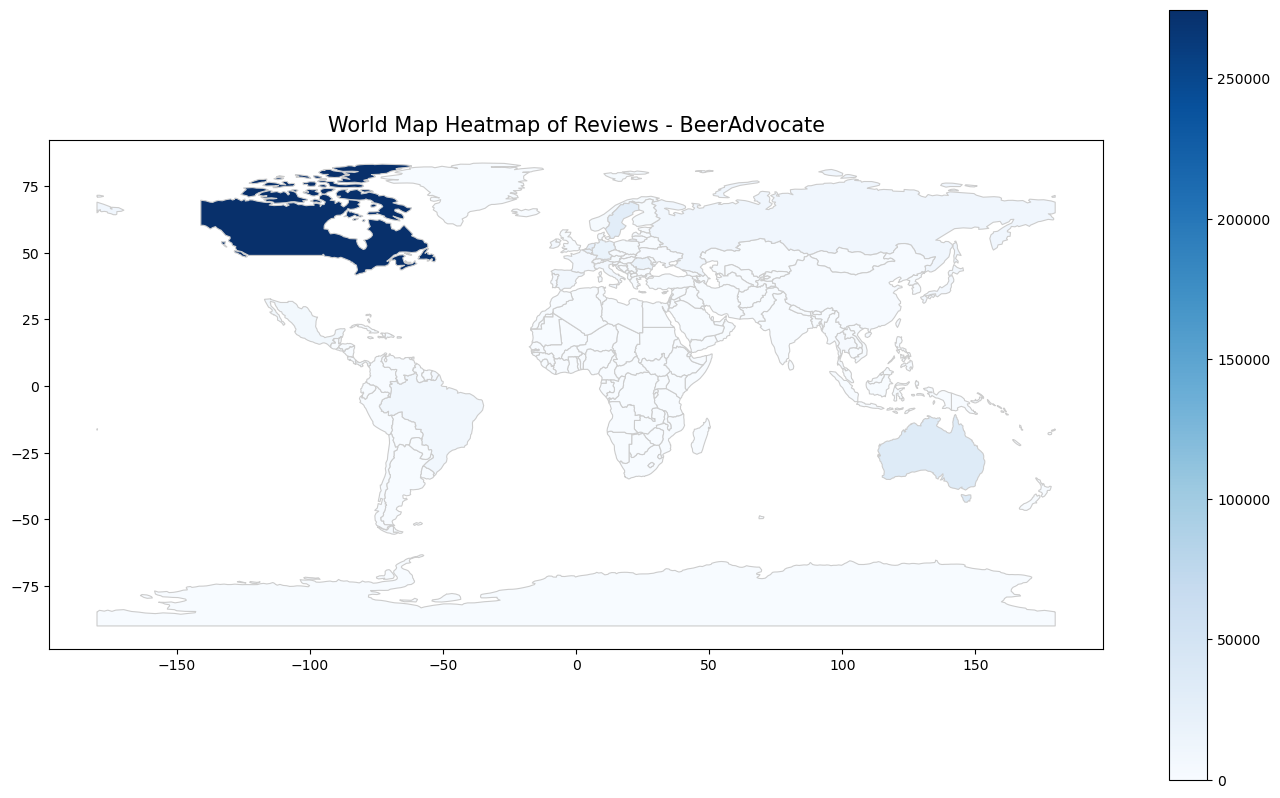

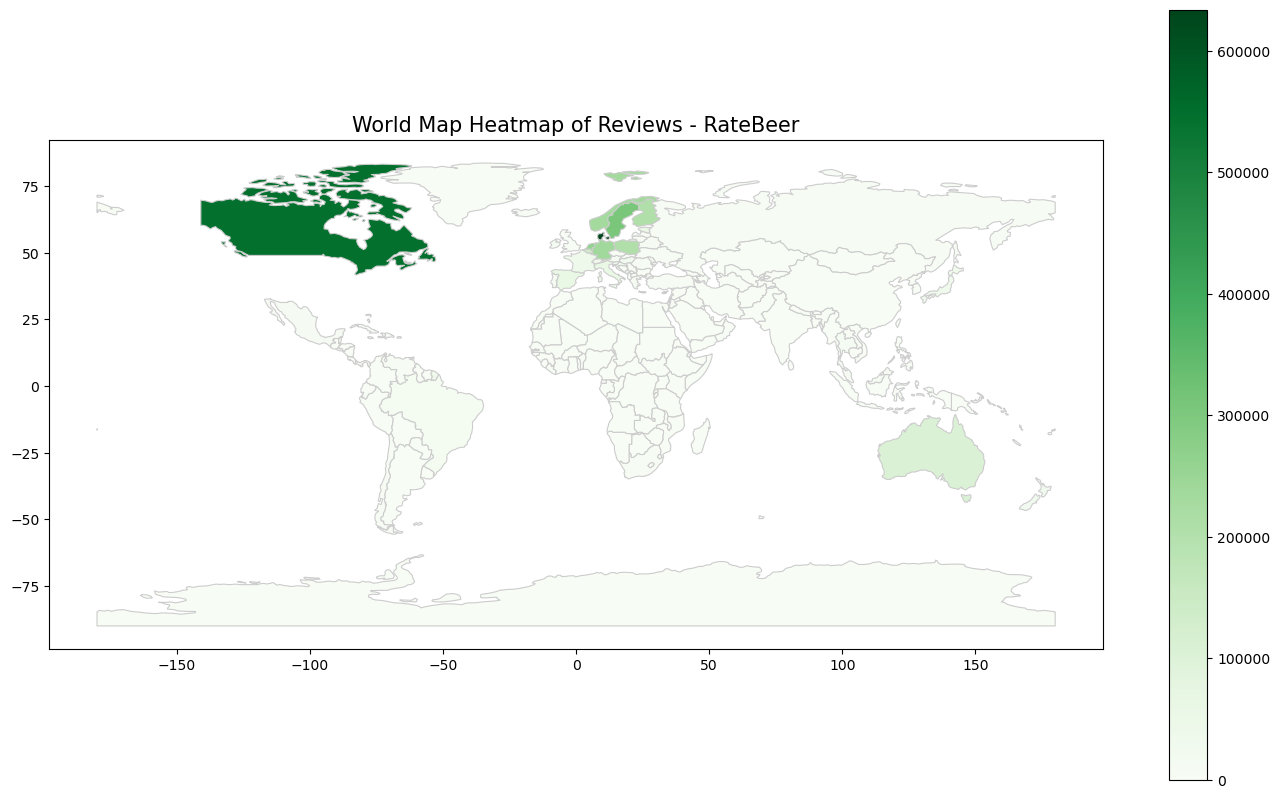

In [75]:
# Remove rows where location is "United States" from the reviews_by_region3 dataset
reviews_by_region3 = reviews_by_region2[reviews_by_region2['location'] != 'United States']

# Prepare BeerAdvocate and RateBeer data
beeradvocate_data2 = reviews_by_region3[['location', 'beeradvocate_reviews']].rename(columns={'beeradvocate_reviews': 'reviews'})
ratebeer_data2 = reviews_by_region3[['location', 'ratebeer_reviews']].rename(columns={'ratebeer_reviews': 'reviews'})

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Remove the United States from the world GeoDataFrame
world = world[world['name'] != 'United States of America']

# Merge BeerAdvocate data with the world map
world_beeradvocate2 = world.merge(beeradvocate_data2, how='left', left_on='name', right_on='location')
world_beeradvocate2['reviews'] = world_beeradvocate2['reviews'].fillna(0)

# Merge RateBeer data with the world map
world_ratebeer2 = world.merge(ratebeer_data2, how='left', left_on='name', right_on='location')
world_ratebeer2['reviews'] = world_ratebeer2['reviews'].fillna(0)

# Plot the BeerAdvocate heatmap
fig, ax = plt.subplots(1, 1, figsize=(17, 10))
world_beeradvocate2.plot(column='reviews', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('World Map Heatmap of Reviews - BeerAdvocate', fontsize=15)
plt.show()

# Plot the RateBeer heatmap
fig, ax = plt.subplots(1, 1, figsize=(17, 10))
world_ratebeer2.plot(column='reviews', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('World Map Heatmap of Reviews - RateBeer', fontsize=15)
plt.show()


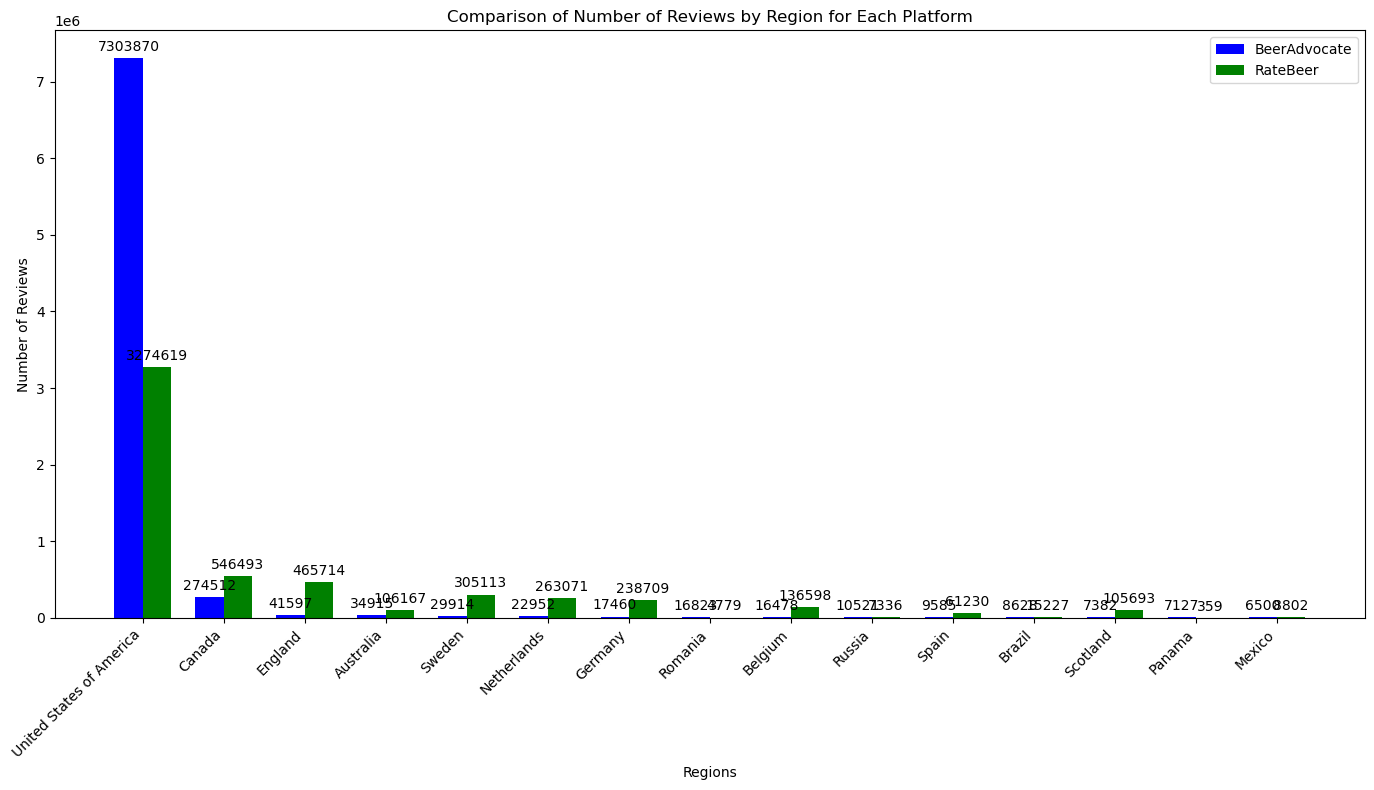

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for the plot
comparison_data = reviews_by_region2[['location', 'beeradvocate_reviews', 'ratebeer_reviews']].copy()
comparison_data.sort_values('beeradvocate_reviews', ascending=False, inplace=True)

# Select the top N regions for visualization
top_n = 15
comparison_data_top_n = comparison_data.head(top_n)

# Create the bar plot
x = np.arange(len(comparison_data_top_n['location']))  # x-axis positions
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Bar for BeerAdvocate reviews
rects1 = ax.bar(x - width/2, comparison_data_top_n['beeradvocate_reviews'], width, label='BeerAdvocate', color='blue')

# Bar for RateBeer reviews
rects2 = ax.bar(x + width/2, comparison_data_top_n['ratebeer_reviews'], width, label='RateBeer', color='green')

# Add labels, title, and legend
ax.set_ylabel('Number of Reviews')
ax.set_xlabel('Regions')
ax.set_title('Comparison of Number of Reviews by Region for Each Platform')
ax.set_xticks(x)
ax.set_xticklabels(comparison_data_top_n['location'], rotation=45, ha='right')
ax.legend()

# Display the values on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', 
                    xy=(rect.get_x() + rect.get_width() / 2, height), 
                    xytext=(0, 3),  # Offset text above bars
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()


We see here that even if we take the top 15 of Beeradvocate, Ratebeer has higher number of reviews, except for the united states.

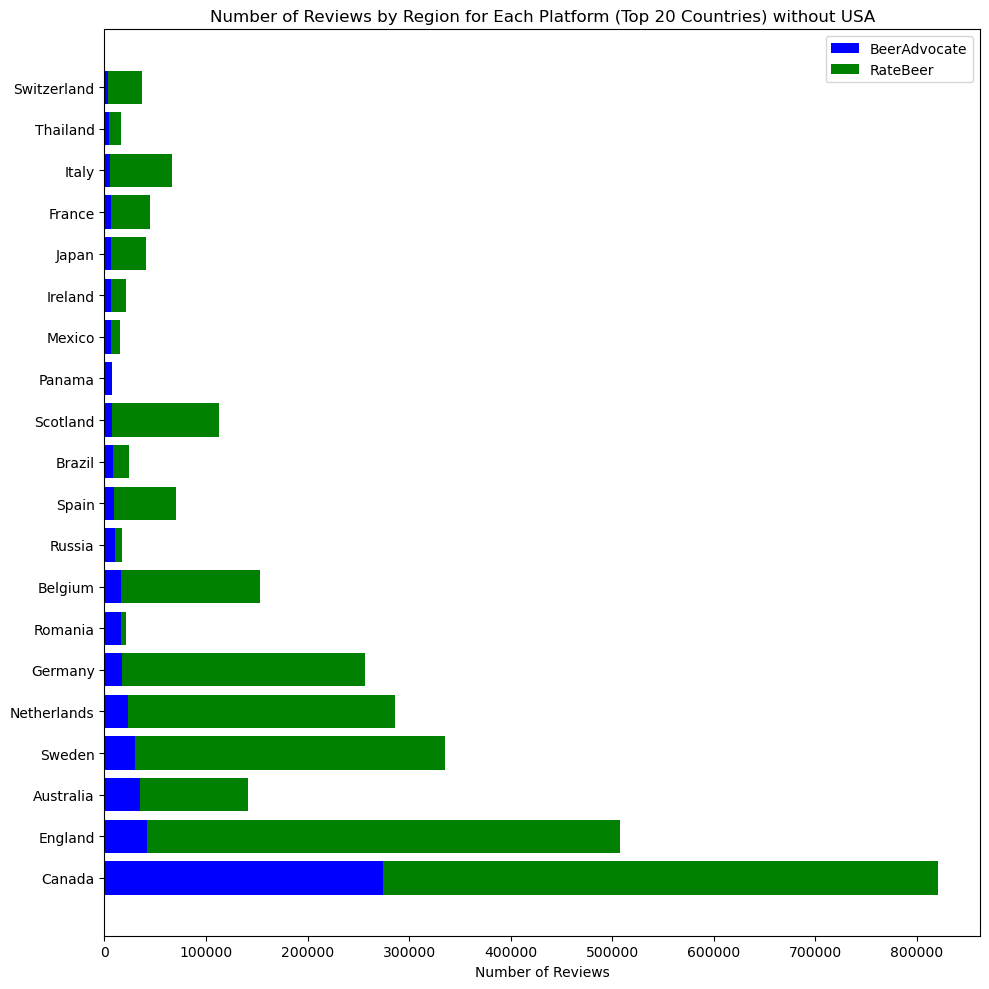

In [87]:
import matplotlib.pyplot as plt

# Drop rows where location is "United States"
reviews_by_region_filtered = reviews_by_region2[reviews_by_region2['location'] != 'United States of America']

# Prepare data for the stacked horizontal bar plot
comparison_data = reviews_by_region_filtered[['location', 'beeradvocate_reviews', 'ratebeer_reviews']].copy()
comparison_data.sort_values('beeradvocate_reviews', ascending=False, inplace=True)  # Sort by BeerAdvocate reviews

# Limit the data to the first 20 countries
comparison_data_top_20 = comparison_data.head(20)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figure size for better readability

# Plot stacked bars
ax.barh(comparison_data_top_20['location'], comparison_data_top_20['beeradvocate_reviews'], label='BeerAdvocate', color='blue')
ax.barh(comparison_data_top_20['location'], comparison_data_top_20['ratebeer_reviews'], 
        left=comparison_data_top_20['beeradvocate_reviews'], label='RateBeer', color='green')

# Add labels and title
ax.set_xlabel('Number of Reviews')
ax.set_title('Number of Reviews by Region for Each Platform (Top 20 Countries) without USA')
ax.legend()

# Adjust layout for readability
plt.tight_layout()
plt.show()
